In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2012.csv', dtype = {'fips': str})
climate_2012 = ur_files.compute()
climate_2012 = climate_2012.loc[:, ~climate_2012.columns.str.contains('^Unnamed')]
climate_2012.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,SuicideDeathRate
0,01001,75.264706,66.724100,9.432410,3.995014,0.130734,0.166205,0.523546,0.000000,0.0,0.199446,69.429011,66.359673,10.8,0.0,3,4.999932
1,01003,12.427907,70.237901,NaN,5.686297,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,9.2,2.0,5,8.910320
2,01005,94.311111,67.143836,9.188219,2.814521,0.131071,0.128767,0.652055,0.019178,0.0,0.197260,67.716385,66.740889,10.1,0.0,5,10.815051
3,01007,162.637500,65.122131,9.145355,2.943716,0.162814,0.098361,0.346995,0.000000,0.0,0.142077,68.108761,64.535456,10.5,2.0,2,4.999932
4,01009,243.931250,61.504372,NaN,3.992623,0.156503,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,11.3,8.0,2,4.999932


In [4]:
climate_2012 = climate_2012[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone', 'rurality', 'SuicideDeathRate']]

In [5]:
climate_2012 = climate_2012.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2012.iloc[:, 1:-1].values
y = climate_2012.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.23361154, 0.06476052, 0.06936772, 0.07485167, 0.03676967,
       0.04152334, 0.04712361, 0.04415435, 0.0062113 , 0.05163816,
       0.07086807, 0.1061443 , 0.0888938 , 0.04535886, 0.01872308])

In [10]:
len(rf.feature_importances_)

15

In [11]:
columns = climate_2012.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'PM2.5',
 'Ozone',
 'rurality']

In [13]:
len(columns)

15

Text(0.5, 0, 'Random Forest Feature Importance')

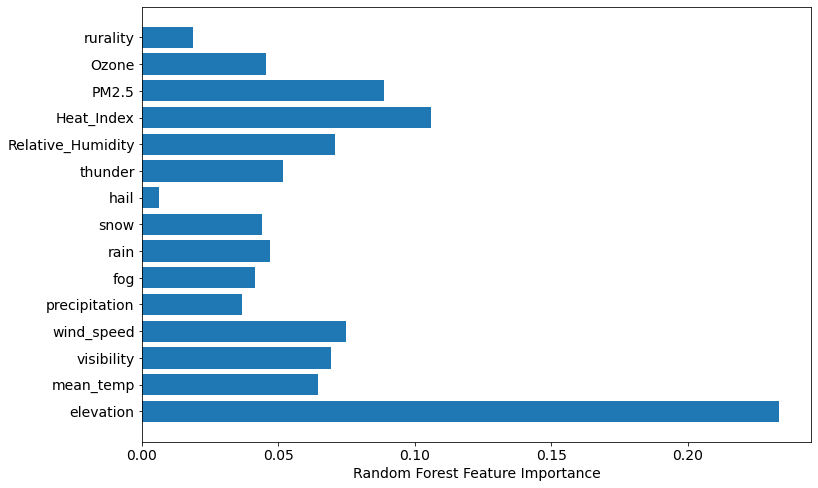

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8, 14,  4,  5,  7, 13,  6,  9,  1,  2, 10,  3, 12, 11,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.0062113 , 0.01872308, 0.03676967, 0.04152334, 0.04415435,
       0.04535886, 0.04712361, 0.05163816, 0.06476052, 0.06936772,
       0.07086807, 0.07485167, 0.0888938 , 0.1061443 , 0.23361154])

Text(0.5, 0, 'Random Forest Feature Importance')

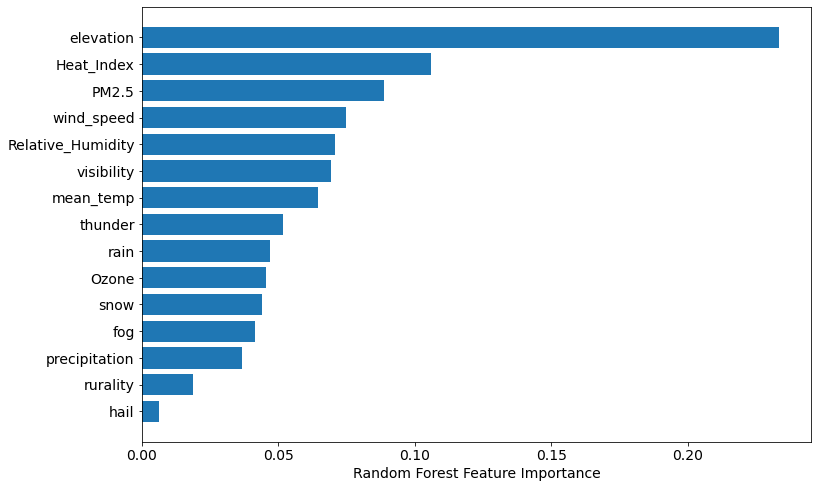

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

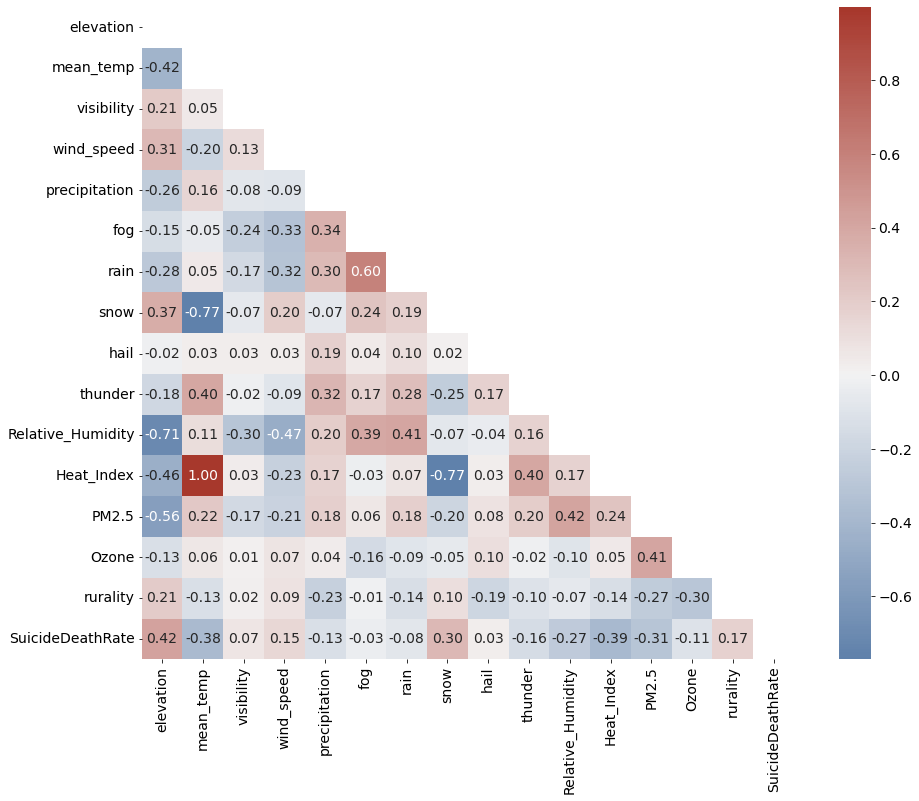

In [21]:
correlation_matrix(climate_2012)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2012.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2012 = ur_files.compute()
social_2012 = social_2012.loc[:, ~social_2012.columns.str.contains('^Unnamed')]
social_2012.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,29115,20968.0,0.134391,0.116955,0.078064,0.079007,0.232133,0.015596,0.008530,0.191664,0.027107,0.242738,0.036865,NaN,0.015077,0.190942,"Linn County, MO",8.561357
1,29091,17763.0,0.206424,0.164695,0.150430,0.075740,0.257840,0.008010,0.031344,0.171907,0.031756,0.248054,0.047954,NaN,0.016787,0.241676,"Howell County, MO",6.770577
2,29101,21375.0,0.165849,0.092846,0.092393,0.045383,0.265229,0.017202,0.047146,0.106978,0.038803,0.226191,0.120365,NaN,0.079186,0.199281,"Johnson County, MO",8.857697
3,29105,19788.0,0.185112,0.195041,0.214846,0.062743,0.232628,0.024490,0.030122,0.156195,0.027297,0.249190,0.054524,NaN,0.009773,0.233273,"Laclede County, MO",6.770577
4,29125,21883.0,0.142525,0.167517,0.121296,0.030032,0.213871,0.018398,0.018954,0.180197,0.014222,0.233917,0.033589,NaN,0.010503,0.261459,"Maries County, MO",4.961524


In [23]:
social_2012['SuicideDeathRate'].isna().sum()

249

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2012 = social_2012.dropna(how = 'any')

In [25]:
social_2012.shape

(807, 18)

In [26]:
X = social_2012.iloc[:, 1:-2].values
y = social_2012.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.10311168, 0.02703467, 0.10372134, 0.05045489, 0.03693264,
       0.05306365, 0.07302437, 0.05239095, 0.08802656, 0.05394651,
       0.04836342, 0.17297906, 0.0466781 , 0.04993339, 0.04033876])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2012.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2012.shape

(807, 18)

In [32]:
climate_2012.shape

(2633, 17)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

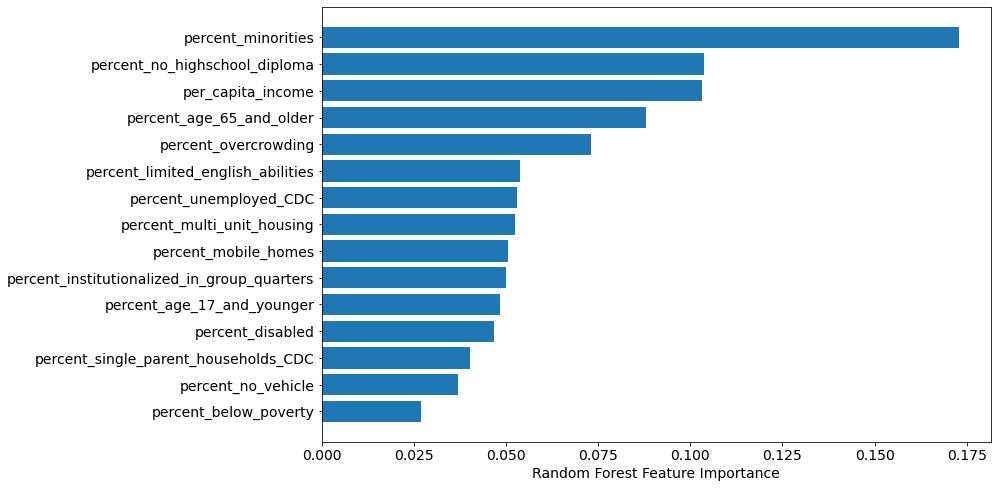

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

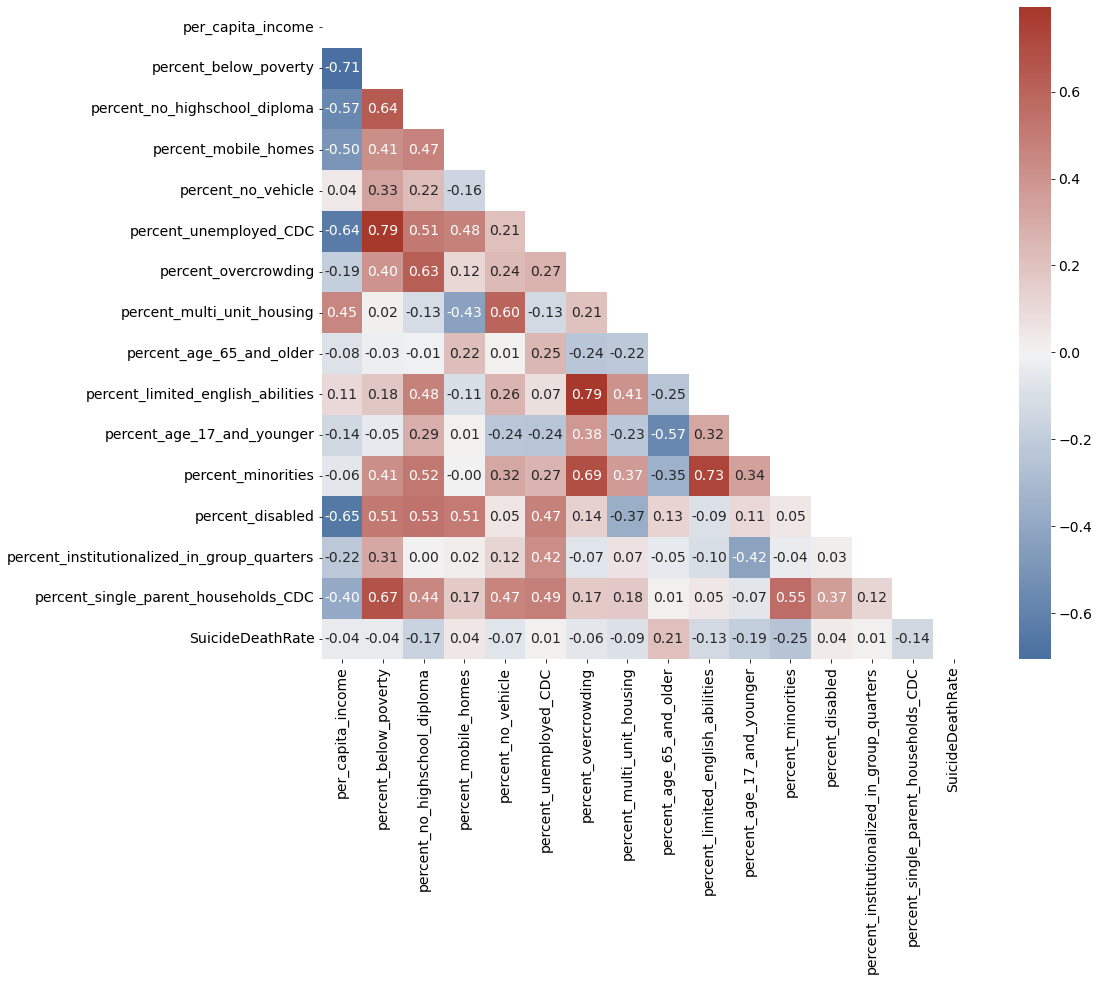

In [36]:
correlation_matrix(social_2012)

## find the rank of importances of all factors

In [37]:
df_total = social_2012.merge(climate_2012, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality
0,29165,35133.0,0.073289,0.062224,0.010595,0.042211,0.153765,0.010497,0.136781,0.113390,...,0.040984,0.265027,0.046448,0.002732,0.109290,56.604308,57.147397,10.5,34.0,2.0
1,29187,18893.0,0.183494,0.215348,0.152066,0.067276,0.282769,0.022141,0.042700,0.143963,...,0.000000,0.120879,0.000000,0.000000,0.120879,61.511177,56.869404,9.8,19.0,5.0
2,29510,22551.0,0.270447,0.183196,0.003923,0.214116,0.272695,0.023298,0.171784,0.111105,...,0.068306,0.319672,0.032787,0.002732,0.090164,60.844078,57.953469,10.5,29.0,1.0
3,29043,24879.0,0.100910,0.086901,0.035471,0.029257,0.176153,0.021015,0.038032,0.124648,...,0.054645,0.278689,0.024590,0.000000,0.103825,58.843497,57.857639,9.9,17.0,3.0
4,29097,20801.0,0.189476,0.175963,0.067591,0.073836,0.204560,0.025997,0.040460,0.132429,...,0.057377,0.259563,0.024590,0.000000,0.120219,58.536838,60.189291,9.9,23.0,4.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone',
       'rurality'], dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index',
       'fog', 'rain', 'snow', 'hail', 'thunder', 'PM2.5',
       'Ozone', 'rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(740, 33)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,Heat_Index,fog,rain,snow,hail,thunder,PM2.5,Ozone,rurality,SuicideDeathRate
0,29165,"Platte County, MO",0.073289,35133.0,0.153765,0.062224,0.113390,0.243683,0.486545,0.222380,...,57.147397,0.040984,0.265027,0.046448,0.002732,0.109290,10.5,34.0,2.0,8.353652
1,29187,"St. Francois County, MO",0.183494,18893.0,0.282769,0.215348,0.143963,0.213055,0.679569,0.223660,...,56.869404,0.000000,0.120879,0.000000,0.000000,0.120879,9.8,19.0,5.0,6.811711
2,29510,"St. Louis city, MO",0.270447,22551.0,0.272695,0.183196,0.111105,0.214914,0.481358,0.530968,...,57.953469,0.068306,0.319672,0.032787,0.002732,0.090164,10.5,29.0,1.0,4.400136
3,29043,"Christian County, MO",0.100910,24879.0,0.176153,0.086901,0.124648,0.271433,0.482978,0.167453,...,57.857639,0.054645,0.278689,0.024590,0.000000,0.103825,9.9,17.0,3.0,6.770577
4,29097,"Jasper County, MO",0.189476,20801.0,0.204560,0.175963,0.132429,0.257784,0.538774,0.266611,...,60.189291,0.057377,0.259563,0.024590,0.000000,0.120219,9.9,23.0,4.0,6.770577


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.0142094 , 0.02802485, 0.01396849, 0.03290934, 0.07032195,
       0.02594298, 0.02758368, 0.02133833, 0.11674238, 0.03373932,
       0.01447695, 0.01957687, 0.01350644, 0.01925855, 0.01926002,
       0.12202273, 0.02340594, 0.02176929, 0.01988452, 0.01348392,
       0.02260468, 0.03190736, 0.01314803, 0.02267157, 0.02536613,
       0.00327575, 0.01865599, 0.17040867, 0.01244242, 0.00809347])

In [47]:
len(rf.feature_importances_)

30

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'PM2.5',
 'Ozone',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

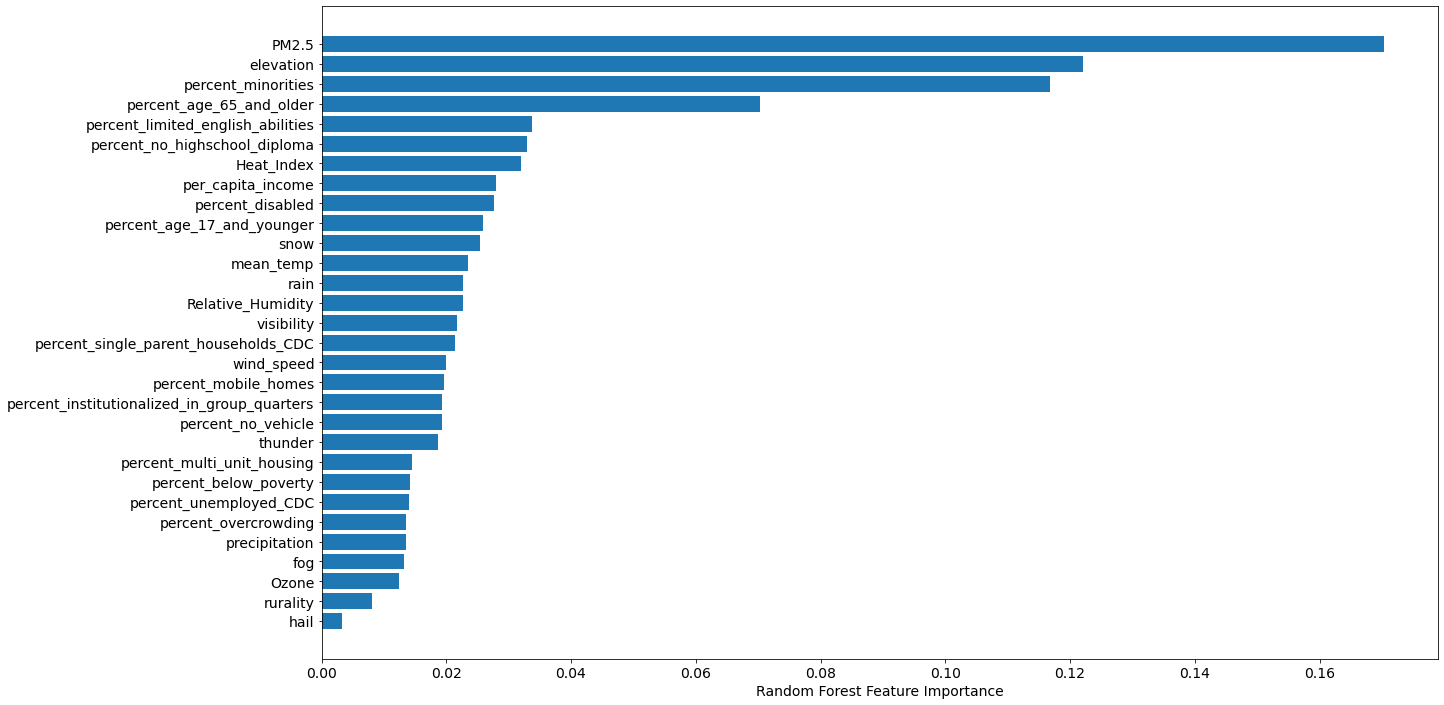

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SHAP

In [52]:
import xgboost
import shap

In [53]:
X = climate_2012.iloc[:, 1:-1]
y = climate_2012.iloc[:, -1].array

In [54]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


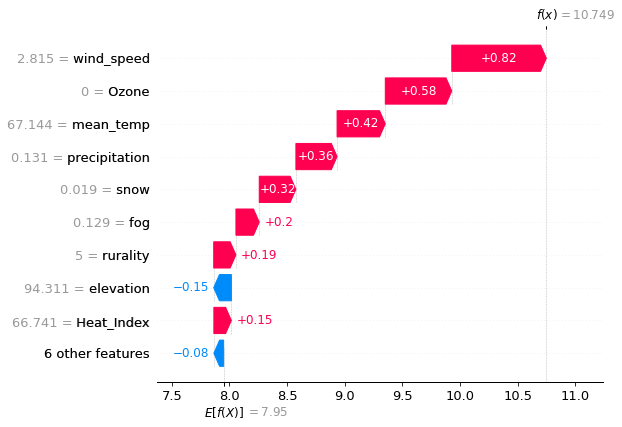

In [55]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

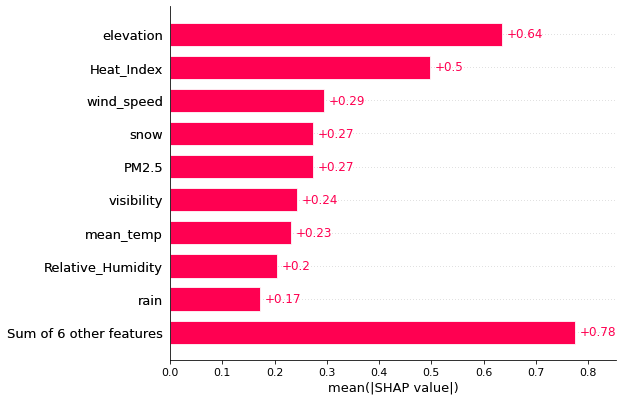

In [56]:
shap.plots.bar(shap_values)

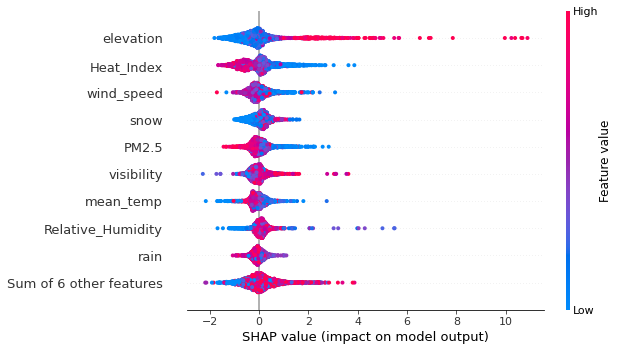

In [57]:
shap.plots.beeswarm(shap_values)

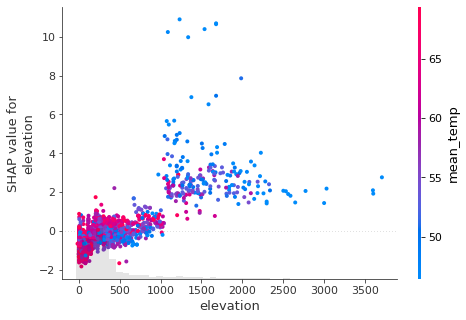

In [58]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

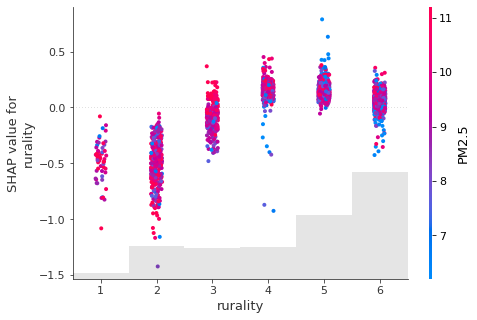

In [59]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

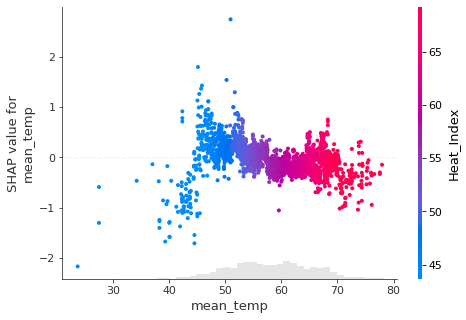

In [60]:
shap.plots.scatter(shap_values[:,"mean_temp"], color=shap_values)

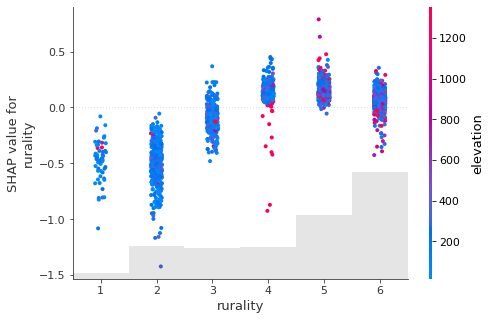

In [61]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

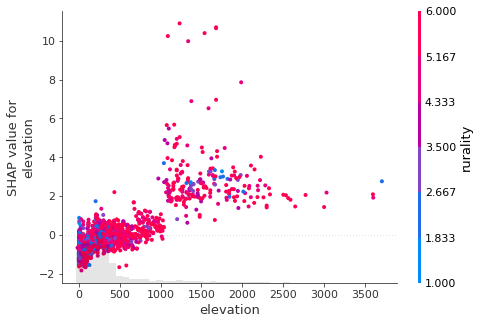

In [62]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

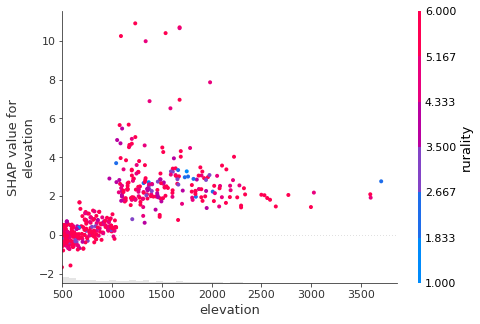

In [64]:
shap.plots.scatter(shap_values[:,"elevation"],shap_values[:,"rurality"], xmin=500)

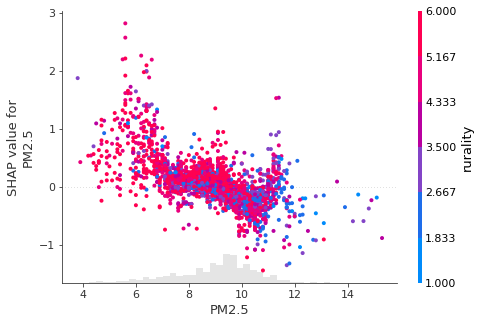

In [65]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"rurality"])

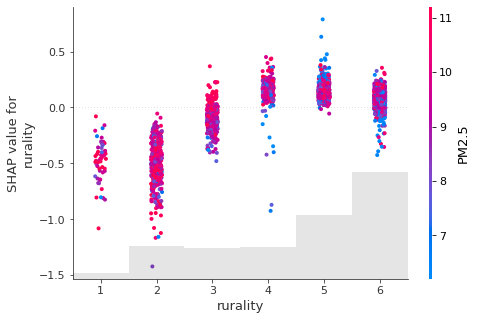

In [66]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"PM2.5"])

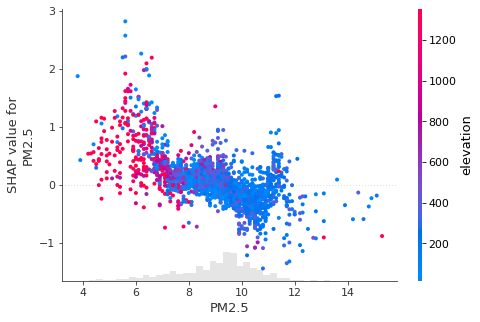

In [67]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"elevation"])

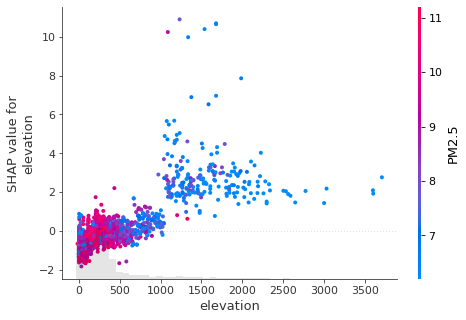

In [68]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"PM2.5"])

### social econimic factors

In [69]:
social_2012.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
6,29165,35133.0,0.073289,0.062224,0.010595,0.042211,0.153765,0.010497,0.136781,0.113390,0.067304,0.243683,0.156922,0.486545,0.009434,0.222380,"Platte County, MO",8.353652
7,29187,18893.0,0.183494,0.215348,0.152066,0.067276,0.282769,0.022141,0.042700,0.143963,0.021944,0.213055,0.072648,0.679569,0.121019,0.223660,"St. Francois County, MO",6.811711
8,29510,22551.0,0.270447,0.183196,0.003923,0.214116,0.272695,0.023298,0.171784,0.111105,0.088802,0.214914,0.577490,0.481358,0.034835,0.530968,"St. Louis city, MO",4.400136
19,29043,24879.0,0.100910,0.086901,0.035471,0.029257,0.176153,0.021015,0.038032,0.124648,0.032617,0.271433,0.058704,0.482978,0.007306,0.167453,"Christian County, MO",6.770577
27,29097,20801.0,0.189476,0.175963,0.067591,0.073836,0.204560,0.025997,0.040460,0.132429,0.068381,0.257784,0.138240,0.538774,0.020181,0.266611,"Jasper County, MO",6.770577


In [70]:
X = social_2012.iloc[:, 1:-2]
y = social_2012.iloc[:, -1].array

In [71]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


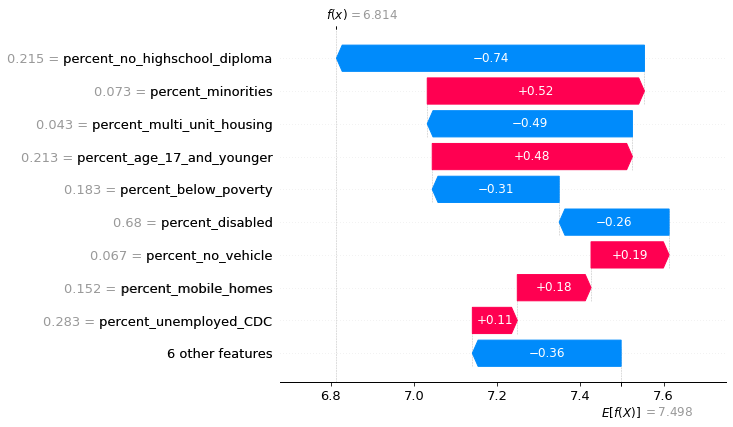

In [72]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

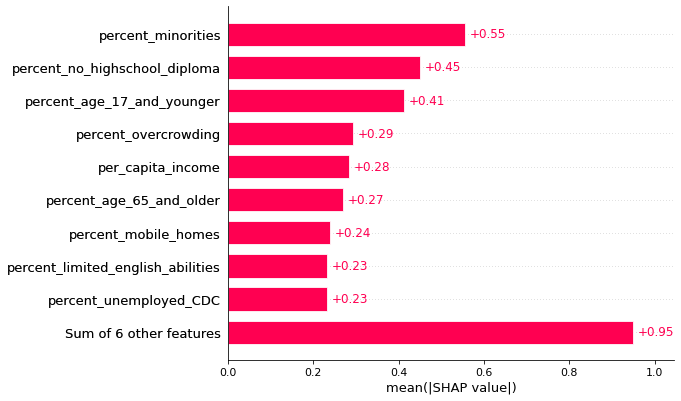

In [73]:
shap.plots.bar(shap_values)

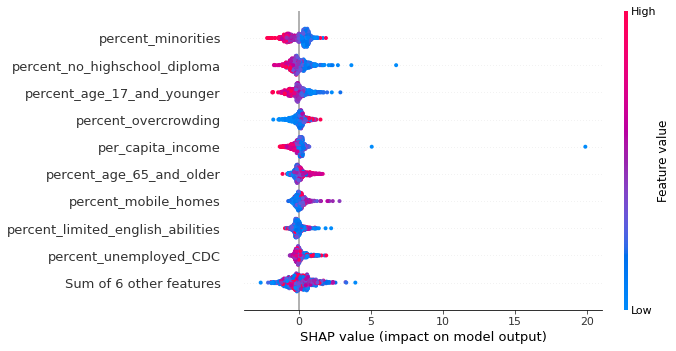

In [74]:
shap.plots.beeswarm(shap_values)

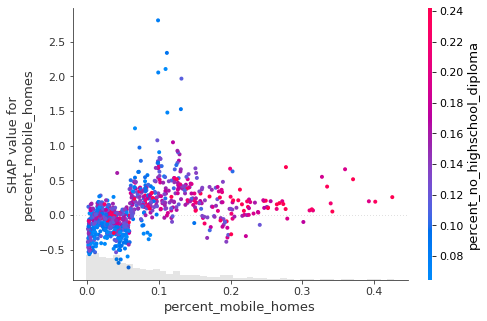

In [75]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)